# Tsunami Initial Condition Setup


### Step  1: Import libararies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Step 2: Define Model Grid



In [2]:
delX = 1/12  
delY = 1/16  
xgOrigin = -158  
ygOrigin = 65   
n_rows = 360     
n_cols = 240    

# Generate the grid coordinates for the Arctic region
xc = np.arange(xgOrigin + delX / 2, xgOrigin + n_cols * delX, delX)
yc = np.arange(ygOrigin + delY / 2, ygOrigin + n_rows * delY, delY)
XC, YC = np.meshgrid(xc, yc)

### Step 3: Define Gussian Bump Parameters

In [3]:
A = 2.0  
center_lon, center_lat = -142, 77.5  
sigma = 1.5  

### Step 4: Create the Gaussian Bump for Initial Sea Surface Height

In [4]:

bump = A * np.exp(-((XC - center_lon)**2 + (YC - center_lat)**2) / (2 * sigma**2))

initial_sea_surface_height = bump  

### Step 5: Plot the Initial Sea Surface Height

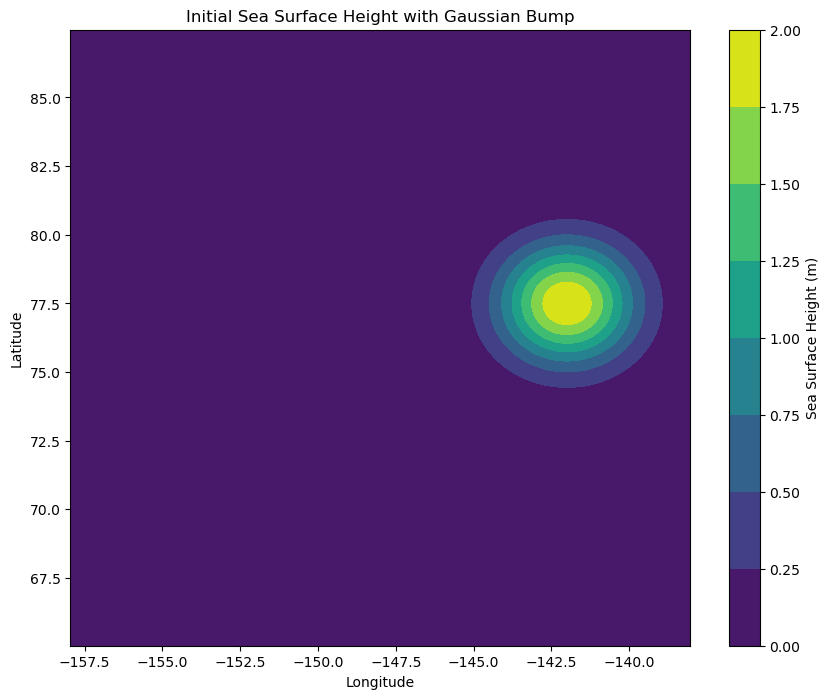

In [5]:
plt.figure(figsize=(10, 8))
plt.contourf(XC, YC, initial_sea_surface_height, cmap='viridis')
plt.colorbar(label='Sea Surface Height (m)')
plt.title('Initial Sea Surface Height with Gaussian Bump')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Step 6: Save Initial Condition to File for Model Use

In [6]:
np.savez('initial_conditions.npz', sea_surface_height=initial_sea_surface_height)

### Step 7: How to implement initial conditions into model at run time

To use these initial conditions in your simulation:
1. Load 'initial_conditions.npz' in to the model
2. Make sure the model reads in the file
3. Sets the initial sea surface height to 'sea_surface_height'.
